<a href="https://colab.research.google.com/github/parkgunha/Chagawa_project/blob/main/%EC%8B%AC%ED%99%94_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_%EB%9E%9C%EB%8D%A4%ED%8F%AC%EB%A0%88%EC%8A%A4%ED%8A%B8_%ED%9A%8C%EA%B7%80_%EB%AA%A8%EB%8D%B8_%EC%B5%9C%EC%A0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
file_path = '/content/drive/MyDrive/Colab Notebooks/full_2_data.csv'
full2_data =  pd.read_csv('full_data.csv')
full2_data

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,carMake,tax(£)
0,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4,audi,NaN
1,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0,audi,NaN
2,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4,audi,NaN
3,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0,audi,NaN
4,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0,audi,NaN
...,...,...,...,...,...,...,...,...,...,...,...
99182,Eos,2012,5990,Manual,74000,Diesel,125.0,58.9,2.0,vw,NaN
99183,Fox,2008,1799,Manual,88102,Petrol,145.0,46.3,1.2,vw,NaN
99184,Fox,2009,1590,Manual,70000,Petrol,200.0,42.0,1.4,vw,NaN
99185,Fox,2006,1250,Manual,82704,Petrol,150.0,46.3,1.2,vw,NaN


In [2]:
#인코딩
from sklearn.preprocessing import LabelEncoder
import numpy as np
lable_list = ['model']
onhot_list = ['transmission', 'fuelType', 'carMake']

def Encoding(df, lable_list, onhot_list):
  """ 범주형데이터를 숫자형으로 변경하는 함수
  df: 변경할 데이터 프레임
  lable_list: 라벨 인코딩
  onhot_list: 원핫 인코딩
  """
  # 라벨 인코딩
  encoding_df=df.copy()
  le = LabelEncoder()
  encoding_df[lable_list] = encoding_df[lable_list].apply(le.fit_transform)
  # 원 핫 인코딩
  encoding_df = pd.get_dummies(encoding_df, columns=onhot_list, drop_first= True, dtype=float)
  # drop_first: 첫번째 더미 삭제, dtype: 불리언에서 정수형으로변경
  print(len(encoding_df.columns))
  return encoding_df

#데이터 분할
from sklearn.model_selection import train_test_split
def Data_split(df, price):
  """ 데이터를 분할하는 함수
  df: 분할할 데이터 프레임
  price: 종속 변수명
  출력
  X_train: 학습데이터
  X_test: 테스트 데이터
  y_train: 학습데이터(실제값)
  y_test: 테스트데이터(실제값)
  """
  X = df.drop(columns=price)
  y = df[price]

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
  print(X_train.shape, X_test.shape)
  print(y_train.shape, y_test.shape)
  return X_train, X_test, y_train, y_test

from mmap import mmap
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# 로그 변환
def Log_Trans(y_train, y_test):
  # y값 로그변환
  log_y_train = np.log1p(y_train)
  log_y_test = np.log1p(y_test)
  return log_y_train, log_y_test

# sd 스케일링
def Sd_Scaling(X_train, X_test, normalize_columns):
  #독립 변수 표준화(standscaler방법)
  sd_X_train = X_train.copy()
  sd_X_test = X_test.copy()
  standscaler = StandardScaler()
  #train데이터 스케일링
  sd_X_test = X_test.copy()
  sd_X_train[normalize_columns] = standscaler.fit_transform(sd_X_train[normalize_columns])
  #test데이터 스케일링
  sd_X_test[normalize_columns] = standscaler.transform(sd_X_test[normalize_columns])
  return sd_X_train, sd_X_test

def MinMax_Scaling(X_train, X_test, normalize_columns):
  #독립 변수 표준화(standscaler방법)
  mm_X_train = X_train.copy()
  mm_X_test = X_test.copy()
  minmaxscaler = MinMaxScaler()
  minmaxscaler.fit(X_train[normalize_columns])
  #train데이터 스케일링
  mm_X_train[normalize_columns] = minmaxscaler.transform(mm_X_train[normalize_columns])
  #test데이터 스케일링
  mm_X_test[normalize_columns] = minmaxscaler.transform(mm_X_test[normalize_columns])
  return mm_X_train, mm_X_test

#  표준 정규화
def Robust_Scaling(X_train, X_test, normalize_columns):
  #독립 변수 표준 정규화(RobustScaler방법)
  robust_X_train = X_train.copy()
  robust_X_test = X_test.copy()
  robustScaler = RobustScaler()
  #train데이터 스케일링
  robust_X_train[normalize_columns] = robustScaler.fit_transform(robust_X_train[normalize_columns])
  #test데이터 스케일링
  robust_X_test[normalize_columns] = robustScaler.transform(robust_X_test[normalize_columns])
  return robust_X_train, robust_X_test
from sklearn.ensemble import RandomForestRegressor

def Rfr_model(x1, x2, y1, y2):
  # 랜덤 포레스트 회귀 모델 학습
  X_train = x1 # X_train: 학습데이터
  X_test = x2 # X_test: 테스트 데이터
  y_train = y1 # y_train: 학습데이터(실제값)
  y_test = y2 # y_test: 테스트데이터(실제값)
  """
  출력
  rfr: 랜덤 포레스트 회귀 모델
  y_train_pred: 학습데이터 예측값
  y_test_pred: 테스트데이터 예측값
  """
  # 랜덤 포레스트 회귀 모델 학습
  rfr = RandomForestRegressor(random_state=42)
  rfr.fit(X_train, y_train)
  # Fitting된 모델로 예측 수행
  y_train_pred = rfr.predict(X_train)
  y_test_pred = rfr.predict(X_test)
  # 랜덤 포레스트 R2-score
  # 학습 정확도
  train_accuarcy = rfr.score(X_train, y_train)
  print("학습 정확도:",rfr.score(X_train, y_train))
  return rfr, y_train_pred, y_test_pred, train_accuarcy

def rfr_feature_importances(rfr, X_train):
  feature_names = X_train.columns
  importance_df = pd.DataFrame({
      'Feature': feature_names,
      'Importance': rfr.feature_importances_
  }).sort_values(by='Importance', ascending=False)
  print(importance_df.head())

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
import numpy as np

# 역변한 필요한 경우
def Exp_y(log_y_test, log_y_test_pred):
  trans_y_test = np.expm1(log_y_test) # 실제값
  trans_y_test_pred = np.expm1(log_y_test_pred) #예상값
  return trans_y_test, trans_y_test_pred

def model_evaluation(y_test, y_test_pred, result_name ) :
  """ 모델 평가 함수
  trans_y_test: 데스트 데이터 역변환 실제값
  trans_y_test_pred: 데스트데이터 역변환 예측값
  result_name: 결과를 저장할 컬럼 이름
  """
  mse = round(mean_squared_error(y_test, y_test_pred),3) # 실제 y값, 예측값
  mae = round(mean_absolute_error(y_test, y_test_pred),3)
  rmse = round(np.sqrt(mean_squared_error(y_test, y_test_pred)),3) # 실제 y값, 예측값
  r2 = round(r2_score(y_test, y_test_pred),3)
  mape = round((mean_absolute_percentage_error(y_test, y_test_pred)*100),3)

  print(f"\nLGBM {result_name} Results")
  print(f"평균 제곱 오차(MSE): {mse}")
  print(f"평균 절대 오차(MAE): {mae}")
  print(f"평균 제곱 오차(MSE): {rmse}")
  print(f"평균 절대비율 오차(MAPE): {mape}")
  print(f"결정 계수(R2): {r2}\n")

  result_list = ['mse', 'rmse', 'mae', 'mape', 'r2']
  result_name = str(result_name)
  result_df = pd.DataFrame(data=[mse, rmse, mae, mape, r2],
                           index=result_list, columns=[result_name])
  return result_df


In [3]:
# 연도 정규화 제외
df = full2_data.copy()
lable_list = ['model']
onhot_list = ['transmission', 'fuelType', 'carMake']
encoding_df = Encoding(df,lable_list,onhot_list)
X_train, X_test, y_train, y_test = Data_split(encoding_df, 'price')

normalize_columns = ["mileage", "tax", "mpg","engineSize"] # 표준 정규화할 변수 리스트

# 로그
log_y_train, log_y_test = Log_Trans(y_train, y_test)
log_rfr, y_train_pred, y_test_pred, train_accuarcy = Rfr_model(X_train, X_test, log_y_train, log_y_test)
trans_y_test, trans_y_test_pred = Exp_y(log_y_test, y_test_pred)
rfr_Log = model_evaluation(trans_y_test, trans_y_test_pred, result_name="rfr_Log")

# 정규화
log_y_train, log_y_test = Log_Trans(y_train, y_test)
mm_X_train, mm_X_test = MinMax_Scaling(X_train, X_test, normalize_columns)
mm_rfr, y_train_pred, y_test_pred, train_accuarcy = Rfr_model(mm_X_train, mm_X_test, log_y_train, log_y_test)
trans_y_test, trans_y_test_pred = Exp_y(log_y_test, y_test_pred)
rfr_mm = model_evaluation(trans_y_test, trans_y_test_pred, result_name="rfr_mm")

# 표준화
log_y_train, log_y_test = Log_Trans(y_train, y_test)
sd_X_train, sd_X_test = Sd_Scaling(X_train, X_test, normalize_columns)
sd_rfr, y_train_pred, y_test_pred, train_accuarcy = Rfr_model(sd_X_train, sd_X_test, log_y_train, log_y_test)
trans_y_test, trans_y_test_pred = Exp_y(log_y_test, y_test_pred)
rfr_sd = model_evaluation(trans_y_test, trans_y_test_pred, result_name="rfr_sd")

# 표준 정규화
log_y_train, log_y_test = Log_Trans(y_train, y_test)
robust_X_train, robust_X_test = Robust_Scaling(X_train, X_test, normalize_columns)
robust_rfr, y_train_pred, y_test_pred, train_accuarcy = Rfr_model(robust_X_train, robust_X_test, log_y_train, log_y_test)
trans_y_test, trans_y_test_pred = Exp_y(log_y_test, y_test_pred)
rfr_robust = model_evaluation(trans_y_test, trans_y_test_pred, result_name="rfr_robust")

result_df = pd.concat([rfr_Log, rfr_mm, rfr_sd, rfr_robust], axis=1)
pd.options.display.float_format = '{:.3f}'.format
result_df

23
(69430, 22) (29757, 22)
(69430,) (29757,)
학습 정확도: 0.9945652688129314

LGBM rfr_Log Results
평균 제곱 오차(MSE): 4120854.409
평균 절대 오차(MAE): 1157.298
평균 제곱 오차(MSE): 2029.989
평균 절대비율 오차(MAPE): 7.193
결정 계수(R2): 0.958

학습 정확도: 0.9945655860417845

LGBM rfr_mm Results
평균 제곱 오차(MSE): 4121818.958
평균 절대 오차(MAE): 1157.452
평균 제곱 오차(MSE): 2030.226
평균 절대비율 오차(MAPE): 7.193
결정 계수(R2): 0.958

학습 정확도: 0.9945638822329439

LGBM rfr_sd Results
평균 제곱 오차(MSE): 4126559.715
평균 절대 오차(MAE): 1157.818
평균 제곱 오차(MSE): 2031.394
평균 절대비율 오차(MAPE): 7.194
결정 계수(R2): 0.958

학습 정확도: 0.9945639184703692

LGBM rfr_robust Results
평균 제곱 오차(MSE): 4127221.908
평균 절대 오차(MAE): 1157.85
평균 제곱 오차(MSE): 2031.557
평균 절대비율 오차(MAPE): 7.194
결정 계수(R2): 0.958



,rfr_Log,rfr_mm,rfr_sd,rfr_robust
mse,4120854.409,4121818.958,4126559.715,4127221.908
rmse,2029.989,2030.226,2031.394,2031.557
mae,1157.298,1157.452,1157.818,1157.850
mape,7.193,7.193,7.194,7.194
r2,0.958,0.958,0.958,0.958


In [4]:
# 연도 이상치 1980이하 제거
df = full2_data.copy()
df = df[df["year"]>1980]
lable_list = ['model']
onhot_list = ['transmission', 'fuelType', 'carMake']
encoding_df = Encoding(df,lable_list,onhot_list)
X_train, X_test, y_train, y_test = Data_split(encoding_df, 'price')

normalize_columns = ["year","mileage", "tax", "mpg"] # 표준 정규화할 변수 리스트

# 로그
log_y_train, log_y_test = Log_Trans(y_train, y_test)
log_rfr, y_train_pred, y_test_pred, train_accuarcy = Rfr_model(X_train, X_test, log_y_train, log_y_test)
rfr_feature_importances(log_rfr, X_train)
trans_y_test, trans_y_test_pred = Exp_y(log_y_test, y_test_pred)
rfr_Log = model_evaluation(trans_y_test, trans_y_test_pred, result_name="rfr_Log")

# 정규화
log_y_train, log_y_test = Log_Trans(y_train, y_test)
mm_X_train, mm_X_test = MinMax_Scaling(X_train, X_test, normalize_columns)
mm_rfr, y_train_pred, y_test_pred, train_accuarcy = Rfr_model(mm_X_train, mm_X_test, log_y_train, log_y_test)
rfr_feature_importances(mm_rfr, mm_X_train)
trans_y_test, trans_y_test_pred = Exp_y(log_y_test, y_test_pred)
rfr_mm = model_evaluation(trans_y_test, trans_y_test_pred, result_name="rfr_mm")

# 표준화
log_y_train, log_y_test = Log_Trans(y_train, y_test)
sd_X_train, sd_X_test = Sd_Scaling(X_train, X_test, normalize_columns)
sd_rfr, y_train_pred, y_test_pred, train_accuarcy = Rfr_model(sd_X_train, sd_X_test, log_y_train, log_y_test)
rfr_feature_importances(sd_rfr, sd_X_train)
trans_y_test, trans_y_test_pred = Exp_y(log_y_test, y_test_pred)
rfr_sd = model_evaluation(trans_y_test, trans_y_test_pred, result_name="rfr_sd")

# 표준 정규화
log_y_train, log_y_test = Log_Trans(y_train, y_test)
robust_X_train, robust_X_test = Robust_Scaling(X_train, X_test, normalize_columns)
robust_rfr, y_train_pred, y_test_pred, train_accuarcy = Rfr_model(robust_X_train, robust_X_test, log_y_train, log_y_test)
rfr_feature_importances(robust_rfr, robust_X_train)
trans_y_test, trans_y_test_pred = Exp_y(log_y_test, y_test_pred)
rfr_robust = model_evaluation(trans_y_test, trans_y_test_pred, result_name="rfr_robust")

result_df = pd.concat([rfr_Log, rfr_mm, rfr_sd, rfr_robust], axis=1)
pd.options.display.float_format = '{:.3f}'.format
result_df

23
(69429, 22) (29756, 22)
(69429,) (29756,)
학습 정확도: 0.9945818788382784
               Feature  Importance
7  transmission_Manual       0.327
1                 year       0.316
5           engineSize       0.171
0                model       0.061
2              mileage       0.046

LGBM rfr_Log Results
평균 제곱 오차(MSE): 4039211.209
평균 절대 오차(MAE): 1146.212
평균 제곱 오차(MSE): 2009.779
평균 절대비율 오차(MAPE): 7.152
결정 계수(R2): 0.959

학습 정확도: 0.9945813173236283
               Feature  Importance
7  transmission_Manual       0.327
1                 year       0.316
5           engineSize       0.171
0                model       0.061
2              mileage       0.046

LGBM rfr_mm Results
평균 제곱 오차(MSE): 4041588.57
평균 절대 오차(MAE): 1146.483
평균 제곱 오차(MSE): 2010.37
평균 절대비율 오차(MAPE): 7.152
결정 계수(R2): 0.959

학습 정확도: 0.9945833815611997
               Feature  Importance
7  transmission_Manual       0.327
1                 year       0.316
5           engineSize       0.171
0                model       0.061
2   

,rfr_Log,rfr_mm,rfr_sd,rfr_robust
mse,4039211.209,4041588.570,4039386.337,4039184.289
rmse,2009.779,2010.370,2009.822,2009.772
mae,1146.212,1146.483,1146.421,1146.573
mape,7.152,7.152,7.153,7.153
r2,0.959,0.959,0.959,0.959


In [5]:
# engineSize 정규화 제외
df = full2_data.copy()
lable_list = ['model']
onhot_list = ['transmission', 'fuelType', 'carMake']
encoding_df = Encoding(df,lable_list,onhot_list)
X_train, X_test, y_train, y_test = Data_split(encoding_df, 'price')

normalize_columns = ["year" , "mileage", "tax", "mpg"] # 표준 정규화할 변수 리스트

# 로그
log_y_train, log_y_test = Log_Trans(y_train, y_test)
log_rfr, y_train_pred, y_test_pred, train_accuarcy = Rfr_model(X_train, X_test, log_y_train, log_y_test)
rfr_feature_importances(log_rfr, X_train)
trans_y_test, trans_y_test_pred = Exp_y(log_y_test, y_test_pred)
rfr_Log = model_evaluation(trans_y_test, trans_y_test_pred, result_name="rfr_Log")

# 정규화
log_y_train, log_y_test = Log_Trans(y_train, y_test)
mm_X_train, mm_X_test = MinMax_Scaling(X_train, X_test, normalize_columns)
mm_rfr, y_train_pred, y_test_pred, train_accuarcy = Rfr_model(mm_X_train, mm_X_test, log_y_train, log_y_test)
rfr_feature_importances(mm_rfr, mm_X_train)
trans_y_test, trans_y_test_pred = Exp_y(log_y_test, y_test_pred)
rfr_mm = model_evaluation(trans_y_test, trans_y_test_pred, result_name="rfr_mm")

# 표준화
log_y_train, log_y_test = Log_Trans(y_train, y_test)
sd_X_train, sd_X_test = Sd_Scaling(X_train, X_test, normalize_columns)
sd_rfr, y_train_pred, y_test_pred, train_accuarcy = Rfr_model(sd_X_train, sd_X_test, log_y_train, log_y_test)
rfr_feature_importances(sd_rfr, sd_X_train)
trans_y_test, trans_y_test_pred = Exp_y(log_y_test, y_test_pred)
rfr_sd = model_evaluation(trans_y_test, trans_y_test_pred, result_name="rfr_sd")

# 표준 정규화
log_y_train, log_y_test = Log_Trans(y_train, y_test)
robust_X_train, robust_X_test = Robust_Scaling(X_train, X_test, normalize_columns)
robust_rfr, y_train_pred, y_test_pred, train_accuarcy = Rfr_model(robust_X_train, robust_X_test, log_y_train, log_y_test)
rfr_feature_importances(robust_rfr, robust_X_train)
trans_y_test, trans_y_test_pred = Exp_y(log_y_test, y_test_pred)
rfr_robust = model_evaluation(trans_y_test, trans_y_test_pred, result_name="rfr_robust")

result_df = pd.concat([rfr_Log, rfr_mm, rfr_sd, rfr_robust], axis=1)
pd.options.display.float_format = '{:.3f}'.format
result_df

23
(69430, 22) (29757, 22)
(69430,) (29757,)
학습 정확도: 0.9945652688129314
               Feature  Importance
7  transmission_Manual       0.328
1                 year       0.318
5           engineSize       0.169
0                model       0.061
2              mileage       0.045

LGBM rfr_Log Results
평균 제곱 오차(MSE): 4120854.409
평균 절대 오차(MAE): 1157.298
평균 제곱 오차(MSE): 2029.989
평균 절대비율 오차(MAPE): 7.193
결정 계수(R2): 0.958

학습 정확도: 0.9945650167757148
               Feature  Importance
7  transmission_Manual       0.328
1                 year       0.318
5           engineSize       0.169
0                model       0.061
2              mileage       0.045

LGBM rfr_mm Results
평균 제곱 오차(MSE): 4120741.966
평균 절대 오차(MAE): 1157.355
평균 제곱 오차(MSE): 2029.961
평균 절대비율 오차(MAPE): 7.193
결정 계수(R2): 0.958

학습 정확도: 0.9945636970617382
               Feature  Importance
7  transmission_Manual       0.328
1                 year       0.318
5           engineSize       0.169
0                model       0.061
2 

,rfr_Log,rfr_mm,rfr_sd,rfr_robust
mse,4120854.409,4120741.966,4125493.225,4124991.489
rmse,2029.989,2029.961,2031.131,2031.008
mae,1157.298,1157.355,1157.723,1157.768
mape,7.193,7.193,7.193,7.195
r2,0.958,0.958,0.958,0.958


In [6]:
df['fuelType'].unique()

array(['Petrol', 'Diesel', 'Hybrid', 'Other', 'Electric'], dtype=object)

In [7]:
# 엔진 사이즈 중 0이며 엔진인경우 제외
df = df[~((df['engineSize'] == 0) & (df['fuelType'].isin(["Petrol", "Diesel"])))]
able_list = ['model']
onhot_list = ['transmission', 'fuelType', 'carMake']
encoding_df = Encoding(df,lable_list,onhot_list)
X_train, X_test, y_train, y_test = Data_split(encoding_df, 'price')

normalize_columns = ["year","mileage", "tax", "mpg", "engineSize"] # 표준 정규화할 변수 리스트

# 로그
log_y_train, log_y_test = Log_Trans(y_train, y_test)
log_rfr, y_train_pred, y_test_pred, train_accuarcy = Rfr_model(X_train, X_test, log_y_train, log_y_test)
rfr_feature_importances(log_rfr, X_train)
trans_y_test, trans_y_test_pred = Exp_y(log_y_test, y_test_pred)
rfr_Log = model_evaluation(trans_y_test, trans_y_test_pred, result_name="rfr_Log")

# 정규화
log_y_train, log_y_test = Log_Trans(y_train, y_test)
mm_X_train, mm_X_test = MinMax_Scaling(X_train, X_test, normalize_columns)
mm_rfr, y_train_pred, y_test_pred, train_accuarcy = Rfr_model(mm_X_train, mm_X_test, log_y_train, log_y_test)
rfr_feature_importances(mm_rfr, mm_X_train)
trans_y_test, trans_y_test_pred = Exp_y(log_y_test, y_test_pred)
rfr_mm = model_evaluation(trans_y_test, trans_y_test_pred, result_name="rfr_mm")

# 표준화
log_y_train, log_y_test = Log_Trans(y_train, y_test)
sd_X_train, sd_X_test = Sd_Scaling(X_train, X_test, normalize_columns)
sd_rfr, y_train_pred, y_test_pred, train_accuarcy = Rfr_model(sd_X_train, sd_X_test, log_y_train, log_y_test)
rfr_feature_importances(sd_rfr, sd_X_train)
trans_y_test, trans_y_test_pred = Exp_y(log_y_test, y_test_pred)
rfr_sd = model_evaluation(trans_y_test, trans_y_test_pred, result_name="rfr_sd")

# 표준 정규화
log_y_train, log_y_test = Log_Trans(y_train, y_test)
robust_X_train, robust_X_test = Robust_Scaling(X_train, X_test, normalize_columns)
robust_rfr, y_train_pred, y_test_pred, train_accuarcy = Rfr_model(robust_X_train, robust_X_test, log_y_train, log_y_test)
rfr_feature_importances(robust_rfr, robust_X_train)
trans_y_test, trans_y_test_pred = Exp_y(log_y_test, y_test_pred)
rfr_robust = model_evaluation(trans_y_test, trans_y_test_pred, result_name="rfr_robust")

result_df = pd.concat([rfr_base, rfr_Log, rfr_mm, rfr_sd, rfr_robust], axis=1)
pd.options.display.float_format = '{:.3f}'.format
result_df

23
(69268, 22) (29687, 22)
(69268,) (29687,)
학습 정확도: 0.9945549079289419
               Feature  Importance
7  transmission_Manual       0.326
1                 year       0.316
5           engineSize       0.173
0                model       0.059
2              mileage       0.047

LGBM rfr_Log Results
평균 제곱 오차(MSE): 4191533.945
평균 절대 오차(MAE): 1143.38
평균 제곱 오차(MSE): 2047.324
평균 절대비율 오차(MAPE): 7.163
결정 계수(R2): 0.956

학습 정확도: 0.9945547344864266
               Feature  Importance
7  transmission_Manual       0.326
1                 year       0.316
5           engineSize       0.173
0                model       0.059
2              mileage       0.047

LGBM rfr_mm Results
평균 제곱 오차(MSE): 4195184.878
평균 절대 오차(MAE): 1143.9
평균 제곱 오차(MSE): 2048.215
평균 절대비율 오차(MAPE): 7.166
결정 계수(R2): 0.956

학습 정확도: 0.9945585754318811
               Feature  Importance
7  transmission_Manual       0.326
1                 year       0.316
5           engineSize       0.173
0                model       0.059
2    

NameError: name 'rfr_base' is not defined

In [ ]:
# 엔진 사이즈 이상치, 연도 이상치, 연도 정규화X
df = df[~((df['engineSize'] == 0) & (df['fuelType'].isin(["Petrol", "Diesel"])))]
df = df[df["year"]>1980]
able_list = ['model']
onhot_list = ['transmission', 'fuelType', 'carMake']
encoding_df = Encoding(df,lable_list,onhot_list)
X_train, X_test, y_train, y_test = Data_split(encoding_df, 'price')

normalize_columns = ["mileage", "tax", "mpg", "engineSize"] # 표준 정규화할 변수 리스트

# 로그
log_y_train, log_y_test = Log_Trans(y_train, y_test)
log_rfr, y_train_pred, y_test_pred, train_accuarcy = Rfr_model(X_train, X_test, log_y_train, log_y_test)
rfr_feature_importances(log_rfr, X_train)
trans_y_test, trans_y_test_pred = Exp_y(log_y_test, y_test_pred)
rfr_Log = model_evaluation(trans_y_test, trans_y_test_pred, result_name="rfr_Log")

# 정규화
log_y_train, log_y_test = Log_Trans(y_train, y_test)
mm_X_train, mm_X_test = MinMax_Scaling(X_train, X_test, normalize_columns)
mm_rfr, y_train_pred, y_test_pred, train_accuarcy = Rfr_model(mm_X_train, mm_X_test, log_y_train, log_y_test)
rfr_feature_importances(mm_rfr, mm_X_train)
log_y_test, log_y_test_pred = Exp_y(log_y_test, y_test_pred)
rfr_mm = model_evaluation(trans_y_test, trans_y_test_pred, result_name="rfr_mm")

# 표준화
log_y_train, log_y_test = Log_Trans(y_train, y_test)
sd_X_train, sd_X_test = Sd_Scaling(X_train, X_test, normalize_columns)
sd_rfr, y_train_pred, y_test_pred, train_accuarcy = Rfr_model(sd_X_train, sd_X_test, log_y_train, log_y_test)
rfr_feature_importances(sd_rfr, sd_X_train)
trans_y_test, trans_y_test_pred = Exp_y(log_y_test, y_test_pred)
rfr_sd = model_evaluation(trans_y_test, trans_y_test_pred, result_name="rfr_sd")

# 표준 정규화
log_y_train, log_y_test = Log_Trans(y_train, y_test)
robust_X_train, robust_X_test = Robust_Scaling(X_train, X_test, normalize_columns)
robust_rfr, y_train_pred, y_test_pred, train_accuarcy = Rfr_model(robust_X_train, robust_X_test, log_y_train, log_y_test)
rfr_feature_importances(robust_rfr, robust_X_train)
trans_y_test, trans_y_test_pred = Exp_y(log_y_test, y_test_pred)
rfr_robust = model_evaluation(trans_y_test, trans_y_test_pred, result_name="rfr_robust")

result_df = pd.concat([rfr_base, rfr_Log, rfr_mm, rfr_sd, rfr_robust], axis=1)
pd.options.display.float_format = '{:.3f}'.format
result_df

In [ ]:
# pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.4/383.4 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 4.0 MB/s eta 0:00:00


In [ ]:
import optuna
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

# 데이터 로드
df = full2_data.copy()
df = df[~((df['engineSize'] == 0) & (df['fuelType'].isin(["Petrol", "Diesel"])))]
able_list = ['model']
onhot_list = ['transmission', 'fuelType', 'carMake']
encoding_df = Encoding(df,lable_list,onhot_list)
X_train, X_test, y_train, y_test = Data_split(encoding_df, 'price')

# 데이터 스케일링
normalize_columns = ["mileage", "tax", "mpg","engineSize"] # 표준 정규화할 변수 리스트
log_y_train, log_y_test = Log_Trans(y_train, y_test)
robust_X_train, robust_X_test = Robust_Scaling(X_train, X_test, normalize_columns)


# 목적 함수 정의
def objective(trial):
    # 하이퍼파라미터 범위 설정
    n_estimators = trial.suggest_int("n_estimators", 50, 300) # 생성할 트리수
    max_depth = trial.suggest_int("max_depth", 3, 20) # 최대 트리 깊이
    min_samples_split = trial.suggest_int("min_samples_split", 2, 20) # 노드 분할 최소 샘플 수
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 20) # 리프의 최소 샘풀 수

    # 모델 생성
    model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42,
        n_jobs=-1
    )

    # 교차 검증을 통한 평가
    score = cross_val_score(model, X_train, y_train, cv=5, scoring="neg_mean_squared_error", n_jobs=-1)
    # MSE가 낮을수록 좋은데 이를 높을 수록 좋은 의미로 변경하기 위해 음수변환을 함.
    return np.mean(score)

# Optuna 최적화 수행
study = optuna.create_study(direction="maximize")  # score 높을 수록 좋은 방향으로 모델로 최적화
study.optimize(objective, n_trials=1, n_jobs=-1) # n_trials는 Optuna가 하이퍼파라미터를 탐색하는 총 시도 횟수

# 최적 하이퍼파라미터 출력
print("Best hyperparameters:", study.best_params)

# 최적 모델 학습 및 평가
best_params = study.best_params
best_model = RandomForestRegressor(**best_params, random_state=42, n_jobs=-1)
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Test MSE:", mse)
#Best hyperparameters: {'n_estimators': 126, 'max_depth': 20, 'min_samples_split': 3, 'min_samples_leaf': 1}
#Test MSE: 3447442.5190360746

[I 2025-02-05 01:43:08,806] A new study created in memory with name: no-name-8d18e965-a60b-4fcf-b325-322efcee6c06


22
(69267, 21) (29687, 21)
(69267,) (29687,)


[I 2025-02-05 01:46:48,127] Trial 0 finished with value: -7098121.849963881 and parameters: {'n_estimators': 120, 'max_depth': 19, 'min_samples_split': 4, 'min_samples_leaf': 16}. Best is trial 0 with value: -7098121.849963881.
[I 2025-02-05 01:46:55,013] Trial 1 finished with value: -6330019.057888915 and parameters: {'n_estimators': 133, 'max_depth': 15, 'min_samples_split': 11, 'min_samples_leaf': 10}. Best is trial 1 with value: -6330019.057888915.
[I 2025-02-05 01:48:24,956] Trial 3 finished with value: -31579315.017845146 and parameters: {'n_estimators': 82, 'max_depth': 3, 'min_samples_split': 14, 'min_samples_leaf': 19}. Best is trial 1 with value: -6330019.057888915.
[I 2025-02-05 01:48:43,333] Trial 2 finished with value: -22988654.769966986 and parameters: {'n_estimators': 250, 'max_depth': 4, 'min_samples_split': 15, 'min_samples_leaf': 12}. Best is trial 1 with value: -6330019.057888915.
[I 2025-02-05 01:51:37,175] Trial 4 finished with value: -31657027.454007156 and param

Best hyperparameters: {'n_estimators': 126, 'max_depth': 20, 'min_samples_split': 3, 'min_samples_leaf': 1}
Test MSE: 3447442.5190360746


22
(69267, 21) (29687, 21)
(69267,) (29687,)
               Feature  Importance
6  transmission_Manual    0.331328
1                 year    0.316980
5           engineSize    0.172459
0                model    0.061014
2              mileage    0.042914
학습 정확도: 0.9903276816175647

LGBM Last_result Results
평균 제곱 오차(MSE): 3428694.146
평균 절대 오차(MAE): 1126.882
평균 제곱 오차(MSE): 1851.673
평균 절대비율 오차(MAPE): 7.016
결정 계수(R2): 0.965

      Last_result
mse   3428694.146
rmse     1851.673
mae      1126.882
mape        7.016
r2          0.965


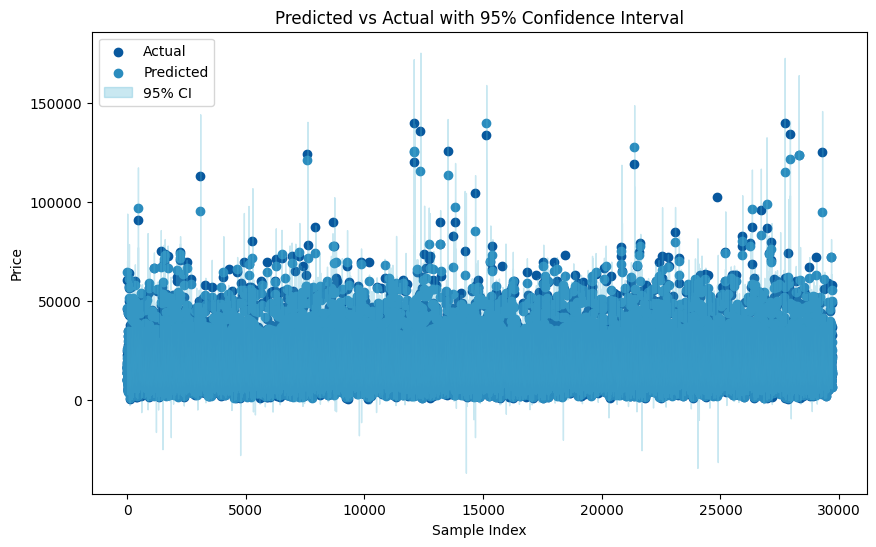

          model  year  mileage    tax   mpg  engineSize transmission  \
99064    Fiesta  2020      525  145.0  58.9         1.0       Manual   
44492   Mokka X  2019      452  145.0  39.2         1.4       Manual   
30896   E Class  2016    13177   20.0  72.4         2.0    Semi-Auto   
71768        X3  2019    19915  145.0  30.4         2.0    Semi-Auto   
79844        X5  2016    41972    0.0  85.6         2.0       Manual   
71908  2 Series  2019      123  145.0  49.6         2.0       Manual   
67742        Up  2020     1000  145.0  50.4         1.0       Manual   
14634        A3  2017    18541   30.0  60.1         1.4       Manual   
66340    Tiguan  2017    18808  160.0  49.6         2.0    Semi-Auto   
40452     Astra  2014    72701  125.0  51.4         1.4       Manual   

       fuelType   carMake  Actual     Predicted  Lower Bound (95%)  \
99064    Petrol      ford   14000  11867.498349        6829.633116   
44492    Petrol  vauxhall   13990  13632.007200       11064.770050 

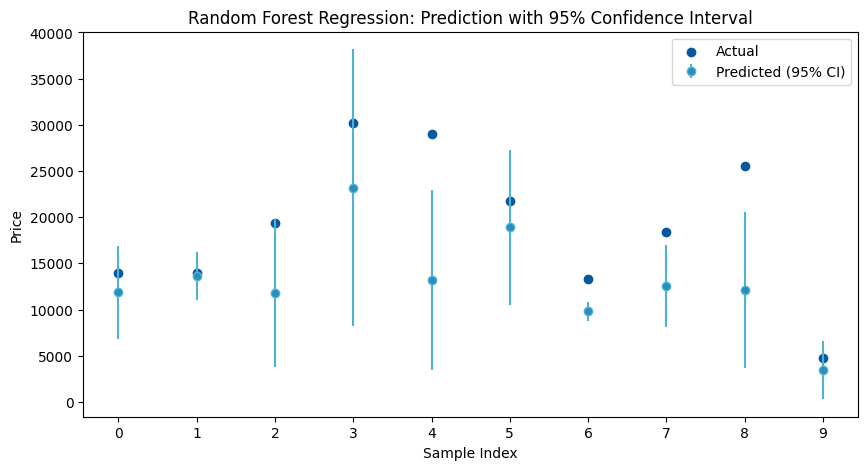

,model,year,mileage,tax,mpg,engineSize,transmission,fuelType,carMake,Actual,Predicted,Lower Bound (95%),Upper Bound (95%)
99064,Fiesta,2020,525,145.0,58.9,1.0,Manual,Petrol,ford,14000,11867.498349,6829.633116,16905.363583
44492,Mokka X,2019,452,145.0,39.2,1.4,Manual,Petrol,vauxhall,13990,13632.007200,11064.770050,16199.244351
30896,E Class,2016,13177,20.0,72.4,2.0,Semi-Auto,Electric,merc,19349,11750.798783,3728.936493,19772.661074
71768,X3,2019,19915,145.0,30.4,2.0,Semi-Auto,Petrol,bmw,30200,23196.562405,8211.545835,38181.578974
79844,X5,2016,41972,0.0,85.6,2.0,Manual,Hybrid,bmw,28999,13188.072425,3433.763074,22942.381777
71908,2 Series,2019,123,145.0,49.6,2.0,Manual,Electric,bmw,21773,18884.416105,10490.626660,27278.205549
67742,Up,2020,1000,145.0,50.4,1.0,Manual,Petrol,vw,13290,9788.662568,8740.563354,10836.761783
14634,A3,2017,18541,30.0,60.1,1.4,Manual,Petrol,bmw,18444,12557.841396,8109.006937,17006.675855
66340,Tiguan,2017,18808,160.0,49.6,2.0,Semi-Auto,Electric,vw,25490,12136.766764,3705.566858,20567.966669
40452,Astra,2014,72701,125.0,51.4,1.4,Manual,Petrol,vauxhall,4791,3432.007018,290.459637,6573.554399


In [ ]:
# 최종 모델 학습
# 테스트 5개정도 추출해서 예측값과 실제값 확인하기
df = full2_data.copy()
df = df[~((df['engineSize'] == 0) & (df['fuelType'].isin(["Petrol", "Diesel"])))]

# 하이퍼 파라미터
n_estimators = 126
max_depth = 20
min_samples_split = 3
min_samples_leaf = 1

# 전처리
lable_list = ['model']
onhot_list = ['transmission', 'fuelType', 'carMake']
encoding_df = Encoding(df,lable_list,onhot_list)

# 데이터 분할
X_train, X_test, y_train, y_test = Data_split(encoding_df, 'price')

# 데이터 스케일링
normalize_columns = ["mileage", "tax", "mpg"] # 표준 정규화할 변수 리스트
log_y_train, log_y_test = Log_Trans(y_train, y_test)
robust_X_train, robust_X_test = Robust_Scaling(X_train, X_test, normalize_columns)

# 모델 학습
model = RandomForestRegressor(n_estimators = 126,
                              max_depth = 20,
                              min_samples_split = 3,
                              min_samples_leaf = 1,
                              random_state=42)
model.fit(robust_X_train, log_y_train)
rfr_feature_importances(model, X_train)
train_accuarcy = model.score(robust_X_train, log_y_train)
print("학습 정확도:", model.score(robust_X_train, log_y_train))
y_test_pred = model.predict(robust_X_test)

# 예측 및 개별 트리 예측값 수집
tree_predictions = np.array([tree.predict(robust_X_test.to_numpy()) for tree in model.estimators_])
"""랜덤포레스트는 feature name을 사용하지만 결정트리에서는 사용하지 않아 오류발생
robust_X_test의 feature name을 제거하기 위해 nupy 배열로 변경"""
tree_predictions = np.expm1(tree_predictions)

# 평균 및 신뢰구간 계산
y_mean = tree_predictions.mean(axis=0)
y_std = tree_predictions.std(axis=0)
lower_bound = y_mean - 1.96 * y_std  # 95% 신뢰구간 하한
upper_bound = y_mean + 1.96 * y_std  # 95% 신뢰구간 상한


# 모델 평가
trans_y_test, trans_y_test_pred = Exp_y(log_y_test, y_test_pred)
Last_result = model_evaluation(trans_y_test, trans_y_test_pred, result_name="Last_result")
print(Last_result)

# 신뢰구간 그래프 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(range(len(trans_y_test)), trans_y_test, color='#08589e', label="Actual")
plt.scatter(range(len(trans_y_test_pred)), trans_y_test_pred, color='#2b8cbe', label="Predicted")
plt.fill_between(range(len(trans_y_test_pred)), lower_bound, upper_bound, color='#4eb3d3', alpha=0.3, label="95% CI")
plt.legend()
plt.xlabel("Sample Index")
plt.ylabel("Price")
plt.title("Predicted vs Actual with 95% Confidence Interval")
plt.show()

# 테스트 데이터 일부 샘플링
np.random.seed(42)
sample_indices = np.random.choice(len(X_test), size=10, replace=False)
X_sample = X_test.iloc[sample_indices]
y_sample = y_test.iloc[sample_indices]
# 셈플 신뢰구간 구하기
tree_predictions = np.array([tree.predict(X_sample.to_numpy()) for tree in model.estimators_])
tree_predictions = np.expm1(tree_predictions)
y_sample_mean = tree_predictions.mean(axis=0)
y_sample_std = tree_predictions.std(axis=0)
y_sample_lower_bound = y_sample_mean - 1.96 * y_sample_std
y_sample_upper_bound = y_sample_mean + 1.96 * y_sample_std

#결과 출력
result_df = X_sample.copy()
encoding_df=df.copy()
le  = LabelEncoder()
encoding_df[lable_list] = encoding_df[lable_list].apply(le.fit_transform)
result_df[lable_list] = result_df[lable_list].apply(le.inverse_transform)
for category in onhot_list:
    category_columns = [col for col in result_df.columns if col.startswith(category + "_")]
    result_df[category] = result_df[category_columns].idxmax(axis=1).str.replace(category + "_", "")
    result_df.drop(columns=category_columns, inplace=True)
result_df["Actual"] = y_sample
result_df["Predicted"] = y_sample_mean
result_df["Lower Bound (95%)"] = y_sample_lower_bound
result_df["Upper Bound (95%)"] = y_sample_upper_bound
print(result_df)

# 결과 시각화
plt.figure(figsize=(10, 5))
plt.errorbar(range(10), y_sample_mean,
             yerr=1.96 * y_sample_std, fmt='o', label="Predicted (95% CI)", color='#4eb3d3', mfc='#2b8cbe')
plt.scatter(range(10), y_sample, color='#08589e', label="Actual")
plt.xlabel("Sample Index")
plt.xticks([0,1,2,3,4,5,6,7,8,9])
plt.ylabel("Price")
plt.legend()
plt.title("Random Forest Regression: Prediction with 95% Confidence Interval")
plt.show()

result_df